# PREPROCESSING AND MODELING PROCESS

In [83]:
import pandas as pd
import json
import ast
import numpy as np
from tqdm import tqdm

In [84]:
df_data = pd.read_csv("full_data.csv")
df_data.shape

(44228, 47)

In [85]:
df_data

,fixture_id,League,season,season_id,round,date,month,day_of_week,side,main_team,...,main_team_rk,rival_team_rk,participants,statistics,events,clouds,feels_like,humidity,temperature,wind_speed
0,10330209,Ligue 1,18-19,12935,3.0,2018-08-25 18:00:00,1,6,A,Reims,...,1.0,5.0,"[{'id': 1028, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787413, 'fixture_id': 10330209, 'type...","[{'id': 32406872, 'fixture_id': 10330209, 'per...",NaN,NaN,NaN,NaN,NaN
1,10330209,Ligue 1,18-19,12935,3.0,2018-08-25 18:00:00,1,6,H,Amiens SC,...,5.0,1.0,"[{'id': 1028, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787413, 'fixture_id': 10330209, 'type...","[{'id': 32406872, 'fixture_id': 10330209, 'per...",NaN,NaN,NaN,NaN,NaN
2,10330210,Ligue 1,18-19,12935,3.0,2018-08-26 15:00:00,1,7,A,Monaco,...,2.0,5.0,"[{'id': 3562, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787511, 'fixture_id': 10330210, 'type...","[{'id': 32406803, 'fixture_id': 10330210, 'per...",NaN,NaN,NaN,NaN,NaN
3,10330210,Ligue 1,18-19,12935,3.0,2018-08-26 15:00:00,1,7,H,Bordeaux,...,5.0,2.0,"[{'id': 3562, 'sport_id': 1, 'country_id': 17,...","[{'id': 3787511, 'fixture_id': 10330210, 'type...","[{'id': 32406803, 'fixture_id': 10330210, 'per...",NaN,NaN,NaN,NaN,NaN
4,10330211,Ligue 1,18-19,12935,3.0,2018-08-26 13:00:00,1,7,A,Guingamp,...,5.0,2.0,"[{'id': 690, 'sport_id': 1, 'country_id': 17, ...","[{'id': 3787449, 'fixture_id': 10330211, 'type...","[{'id': 32407050, 'fixture_id': 10330211, 'per...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44223,19167985,Serie B,24-25,23839,33.0,2025-04-12 13:00:00,9,6,H,Reggiana,...,14.0,2.0,"[{'id': 2892, 'sport_id': 1, 'country_id': 251...","[{'id': 356436184, 'fixture_id': 19167985, 'ty...","[{'id': 149684317, 'fixture_id': 19167985, 'pe...",76.0,16.48,56.0,17.12,2.55
44224,19167986,Serie B,24-25,23839,33.0,2025-04-12 13:00:00,9,6,A,Südtirol,...,12.0,15.0,"[{'id': 176, 'sport_id': 1, 'country_id': 251,...","[{'id': 356393614, 'fixture_id': 19167986, 'ty...","[{'id': 149685958, 'fixture_id': 19167986, 'pe...",100.0,14.38,77.0,14.62,1.78
44225,19167986,Serie B,24-25,23839,33.0,2025-04-12 13:00:00,9,6,H,Salernitana,...,15.0,12.0,"[{'id': 176, 'sport_id': 1, 'country_id': 251,...","[{'id': 356393614, 'fixture_id': 19167986, 'ty...","[{'id': 149685958, 'fixture_id': 19167986, 'pe...",100.0,14.38,77.0,14.62,1.78
44226,19167987,Serie B,24-25,23839,33.0,2025-04-12 15:15:00,9,6,A,Cittadella,...,12.0,14.0,"[{'id': 8485, 'sport_id': 1, 'country_id': 251...","[{'id': 356956919, 'fixture_id': 19167987, 'ty...","[{'id': 149693032, 'fixture_id': 19167987, 'pe...",47.0,18.89,68.0,19.95,5.58


In [86]:
df_data.isna().sum()

fixture_id                         0
League                             0
season                             0
season_id                          0
round                              0
date                               0
month                              0
day_of_week                        0
side                               0
main_team                          0
rival_team                         0
winner                             0
goals_diff                         0
main_team_formation                0
rival_team_formation               0
main_team_lineup                   0
rival_team_lineup                  0
main_team_bench                    0
rival_team_bench                   0
main_team_acc_possession           0
rival_team_acc_possession          0
main_team_acc_goals                0
rival_team_acc_goals               0
main_team_acc_corners              0
rival_team_acc_corners             0
main_team_acc_yellow_cards         0
rival_team_acc_yellow_cards        0
m

In [87]:
# df_summary = df_data.groupby("main_team_formation").agg({
#     "main_team_goals": "mean",
#     "main_team_red_cards": "mean",
#     "main_team_yellow_cards": "mean",
#     "main_team_possession": "mean",
#     "main_team_corners": "mean"
# }).rename(columns={
#     "main_team_goals": "goals_avg",
#     "main_team_red_cards": "red_cards_avg",
#     "main_team_yellow_cards": "yellow_cards_avg",
#     "main_team_possession": "possession_avg",
#     "main_team_corners": "corners_avg"
# }).reset_index()
# df_summary.round(3)

In [88]:
df_data.sample(5)

,fixture_id,League,season,season_id,round,date,month,day_of_week,side,main_team,...,main_team_rk,rival_team_rk,participants,statistics,events,clouds,feels_like,humidity,temperature,wind_speed
1472,10342922,Bundesliga,18-19,13005,17.0,2018-12-22 14:30:00,5,6,A,Werder Bremen,...,7.0,3.0,"[{'id': 277, 'sport_id': 1, 'country_id': 11, ...","[{'id': 3830046, 'fixture_id': 10342922, 'type...","[{'id': 32482426, 'fixture_id': 10342922, 'per...",NaN,NaN,NaN,NaN,NaN
28927,18548403,Serie A,22-23,19806,30.0,2023-04-17 18:45:00,9,1,H,Fiorentina,...,9.0,7.0,"[{'id': 708, 'sport_id': 1, 'country_id': 251,...","[{'id': 16310758, 'fixture_id': 18548403, 'typ...","[{'id': 82863272, 'fixture_id': 18548403, 'per...",97.0,285.69,58.0,286.62,4.78
39838,19136779,Eredivisie,24-25,23628,30.0,2025-04-27 10:15:00,9,7,A,Willem II,...,12.0,9.0,"[{'id': 669, 'sport_id': 1, 'country_id': 38, ...","[{'id': 369684121, 'fixture_id': 19136779, 'ty...","[{'id': 149889960, 'fixture_id': 19136779, 'pe...",72.0,7.23,49.0,8.56,3.21
23469,18529105,Ekstraklasa (Poland),22-23,19692,12.0,2022-10-08 13:00:00,3,6,H,Śląsk Wrocław,...,7.0,7.0,"[{'id': 3962, 'sport_id': 1, 'country_id': 2, ...","[{'id': 6379325, 'fixture_id': 18529105, 'type...","[{'id': 51232837, 'fixture_id': 18529105, 'per...",NaN,NaN,NaN,NaN,NaN
14507,17056719,La Liga 2,20-21,17483,4.0,2020-10-04 16:15:00,3,7,H,Almería,...,1.0,1.0,"[{'id': 618, 'sport_id': 1, 'country_id': 32, ...","[{'id': 7527592, 'fixture_id': 17056719, 'type...","[{'id': 34814762, 'fixture_id': 17056719, 'per...",NaN,NaN,NaN,NaN,NaN


In [89]:
#Create a column which is the main_team_formation concatenated with "_" and the rival_team_formation
df_data["combined_formation"] = df_data["main_team_formation"] + "/" + df_data["rival_team_formation"]
print(df_data["combined_formation"].value_counts())
print(len(df_data["combined_formation"].unique()))

combined_formation
4-2-3-1/4-2-3-1    4524
4-3-3/4-3-3        2370
4-3-3/4-2-3-1      2324
4-2-3-1/4-3-3      2324
4-2-3-1/4-4-2      1951
4-4-2/4-2-3-1      1951
4-4-2/4-4-2        1640
3-5-2/3-5-2        1608
4-2-3-1/3-5-2      1529
3-5-2/4-2-3-1      1529
3-4-3/4-2-3-1      1442
4-2-3-1/3-4-3      1442
4-3-3/3-5-2        1441
3-5-2/4-3-3        1441
4-4-2/4-3-3        1324
4-3-3/4-4-2        1324
5-4-1/4-2-3-1      1243
4-2-3-1/5-4-1      1243
3-4-3/3-4-3        1176
3-5-2/3-4-3        1001
3-4-3/3-5-2        1001
3-4-3/4-3-3         862
4-3-3/3-4-3         862
4-4-2/3-5-2         745
3-5-2/4-4-2         745
4-4-2/3-4-3         630
3-4-3/4-4-2         630
5-4-1/4-4-2         617
4-4-2/5-4-1         617
5-4-1/4-3-3         492
4-3-3/5-4-1         492
3-4-3/5-4-1         407
5-4-1/3-4-3         407
5-4-1/5-4-1         310
5-4-1/3-5-2         292
3-5-2/5-4-1         292
Name: count, dtype: int64
36


## VARIABLES SELECTION

In [90]:
df_data["red_cards_diff"] = df_data["main_team_acc_red_cards"] - df_data["rival_team_acc_red_cards"]
df_data["yellow_cards_diff"] = df_data["main_team_acc_yellow_cards"] - df_data["rival_team_acc_yellow_cards"]
df_data["corners_diff"] = df_data["main_team_acc_corners"] - df_data["rival_team_acc_corners"]
df_data["possession_diff"] = df_data["main_team_acc_possession"] - df_data["rival_team_acc_possession"]
#Goals diff were calculated previously

In [91]:
D_col = "combined_formation"
 

#WE CONSIDER EXACT PROFILES SUCH AS BARÇA'S POSSESSION+CORNERS+GOALS... 
X_values_list = [
    # 'League', 'season', 'main_team', 'rival_team', 
    'season_id','round',
    'day_of_week', 'side', 
      #  'rival_team_formation',
       'main_team_acc_pointsL','main_team_acc_pointsA','rival_team_acc_pointsL', 
       'rival_team_acc_pointsA','main_team_plays_CL', 'rival_team_plays_CL',
       'main_team_rk', 'rival_team_rk','clouds', 'feels_like', 'humidity', 'temperature','wind_speed',
       "red_cards_diff","yellow_cards_diff","corners_diff","possession_diff",
       "combined_formation" #Then it will be removed from the list of features
       , "month" #We leave month just for the knn imputer in the weather.
       ]

# y = "winner" 
target1 = "goals_diff"

In [92]:
df_data[X_values_list].tail()

,season_id,round,day_of_week,side,main_team_acc_pointsL,main_team_acc_pointsA,rival_team_acc_pointsL,rival_team_acc_pointsA,main_team_plays_CL,rival_team_plays_CL,...,feels_like,humidity,temperature,wind_speed,red_cards_diff,yellow_cards_diff,corners_diff,possession_diff,combined_formation,month
44223,23839,33.0,6,H,0.375000,0.291667,0.750000,0.562500,0,0,...,16.48,56.0,17.12,2.55,-0.064586,0.902116,-0.384149,0.690889,3-5-2/3-4-3,9
44224,23839,33.0,6,A,0.375000,0.354167,0.458333,0.166667,0,0,...,14.38,77.0,14.62,1.78,-0.032328,-0.032398,-0.068756,-7.470819,3-5-2/3-4-3,9
44225,23839,33.0,6,H,0.458333,0.166667,0.375000,0.354167,0,0,...,14.38,77.0,14.62,1.78,0.032328,0.032398,0.068756,7.470819,3-4-3/3-5-2,9
44226,23839,33.0,6,A,0.250000,0.479167,0.375000,0.291667,0,0,...,18.89,68.0,19.95,5.58,-0.193721,0.259418,-0.641508,-5.010933,3-5-2/4-3-3,9
44227,23839,33.0,6,H,0.375000,0.291667,0.250000,0.479167,0,0,...,18.89,68.0,19.95,5.58,0.193721,-0.259418,0.641508,5.010933,4-3-3/3-5-2,9


## Split train-test

In [62]:
from sklearn.model_selection import train_test_split

# Split data before applying transformations
# Ensure unique fixture_id is either in train or test
unique_fixtures = df_data["fixture_id"].unique()
train_fixtures, test_fixtures = train_test_split(unique_fixtures, test_size=0.2, random_state=42)

# Filter the data based on the split fixture_id
X_train_aux = df_data[df_data["fixture_id"].isin(train_fixtures)][X_values_list]
X_test_aux = df_data[df_data["fixture_id"].isin(test_fixtures)][X_values_list]
y_train = df_data[df_data["fixture_id"].isin(train_fixtures)][target1]
y_test = df_data[df_data["fixture_id"].isin(test_fixtures)][target1]

D_train = X_train_aux[D_col]
D_test = X_test_aux[D_col]
#comvert D_train to a pd.dataframe with the column "original":
D_train = pd.DataFrame(D_train)
D_train.columns = ["original"]
D_test = pd.DataFrame(D_test)
D_test.columns = ["original"]

X_train = X_train_aux.drop(columns=[D_col])   #WE KEEP combined_formation
X_test = X_test_aux.drop(columns=[D_col])
# X_train = X_train_aux.copy()
# X_test = X_test_aux.copy()  
#Both created as a copy since we disregard the dropping of combined_formation

## Missing Data Treatment

In [63]:
from sklearn.impute import KNNImputer

# Apply KNN imputation only to X_train
def impute_weather_with_knn(X_train, X_test):
    features = ['clouds', 'feels_like', 'humidity', 'temperature', 'wind_speed', 'month', 'season_id']
    
    imputer = KNNImputer(n_neighbors=min(10, len(X_train)))

    # Fit only on X_train and transform both sets
    X_train[features] = imputer.fit_transform(X_train[features])  # Learn from train
    X_test[features] = imputer.transform(X_test[features])        # Apply to test

    return X_train, X_test

# Impute missing values
# X1_train_aux, X1_test_aux = impute_weather_with_knn(X_train.copy(), X_test.copy())
X_train, X_test = impute_weather_with_knn(X_train.copy(), X_test.copy())

## Data Encoding 

In [64]:
side_mapping = {"H": 1, "A": 0}

X_train["side"] = X_train["side"].map(side_mapping)
X_test["side"] = X_test["side"].map(side_mapping)

In [65]:
#We use One-Hot Encoding for "season_id" and "day_of_week":
X_train = pd.get_dummies(X_train, columns=["season_id","day_of_week"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["season_id","day_of_week"], drop_first=True)

##### We drop the non-encoded variables and other no-longer needed variables:

In [66]:
X_train.drop(['month'], axis = 1, inplace = True)
X_test.drop(['month'], axis = 1, inplace = True)

## Standarize Data

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_cols = X_train.columns
X_train = scaler.fit_transform(X_train)  # Standardizes the entire dataframe
X_train = pd.DataFrame(X_train, columns=X1_cols)

# 2. Scale X_test using the SAME scaler
X1_test_cols = X_test.columns
X1_test_scaled = scaler.transform(X_test)  # Transform on X_test (no fit)
X_test = pd.DataFrame(X1_test_scaled, columns=X1_test_cols)

# Modeling

## 1st Model: goals_diff ~ Confounders

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint, uniform
from sklearn.metrics import r2_score


# Define models and parameter grids
models1 = {
    "LinearRegression": (LinearRegression(), {"fit_intercept": [True, False],"copy_X": [True, False],"positive": [True, False]}),
    
    # "SVR": (SVR(), {"C": uniform(0.1, 100),"epsilon": uniform(0.01, 1),"kernel": ["linear", "rbf", "poly"],}),
    
    # "RandomForest": (RandomForestRegressor(), {"n_estimators": randint(50, 500),"max_depth": randint(2, 20),
    #                                            "min_samples_split": randint(2, 10),"min_samples_leaf": randint(1, 10),}),   #30 min
    
    "XGBoost": (XGBRegressor(), {"n_estimators": randint(50, 400),"learning_rate": uniform(0.01, 0.3),"max_depth": randint(2, 15),
                                 "subsample": uniform(0.5, 0.5),"colsample_bytree": uniform(0.5, 0.5),
    }),
    
    # "LightGBM": (LGBMRegressor(), {"n_estimators": randint(50, 500),"learning_rate": uniform(0.01, 0.3),
    #                                "num_leaves": randint(10, 100),"max_depth": randint(2, 20),"subsample": uniform(0.5, 0.5),})  too mutch overfitting
}

# Run RandomizedSearchCV for each model
best_models1 = {}
results1 = []
list_residuals1_train = {}
list_residuals1_test = {}

for name, (model, param_grid) in tqdm(models1.items()):
    print(f"🔍 Tuning {name}...")
    
    search = RandomizedSearchCV(model, param_distributions=param_grid,n_iter=20, cv=5, 
                                scoring="neg_mean_squared_error",n_jobs=-1, random_state=42)
    
    # search = BayesSearchCV(model,param_grid,n_iter=30, scoring='neg_mean_squared_error',cv=5,n_jobs=-1,random_state=42)
    
    search.fit(X_train, y_train)
    
    best_models1[name] = search.best_estimator_
    
    y_train_pred = search.best_estimator_.predict(X_train)
    # Evaluate on test set
    y_test_pred = search.best_estimator_.predict(X_test)
    
    list_residuals1_train[name] = y_train - y_train_pred
    list_residuals1_test[name] = y_test - y_test_pred
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print results
    print(f"Training MSE: {train_mse:.4f}, Training R²: {train_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")
    
    results1.append({"Model": name, "Best Params": search.best_params_, "Train MSE": train_mse, "Test MSE": test_mse,
        "Train R2": train_r2, "Test R2": test_r2, "Residuals Train":list_residuals1_train[name],"Residuals_test":list_residuals1_test[name]})
    
    print(f"✅ {name} Best MSE: {test_mse:.4f}")

# Convert results to DataFrame for better visualization
results_df1 = pd.DataFrame(results1)
results_df1.head()


  0%|          | 0/2 [00:00<?, ?it/s]c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


🔍 Tuning LinearRegression...


 50%|█████     | 1/2 [00:17<00:17, 17.62s/it]

Training MSE: 2.6141, Training R²: 0.1656
Test MSE: 2.6473, Test R²: 0.1632
✅ LinearRegression Best MSE: 2.6473
🔍 Tuning XGBoost...


c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

Training MSE: 2.5383, Training R²: 0.1898
Test MSE: 2.6244, Test R²: 0.1705
✅ XGBoost Best MSE: 2.6244


,Model,Best Params,Train MSE,Test MSE,Train R2,Test R2,Residuals Train,Residuals_test
0,LinearRegression,"{'positive': True, 'fit_intercept': False, 'co...",2.614117,2.647262,0.165635,0.163236,0 -3.269507 1 3.841945 2 -0...,6 1.992894 7 -1.624183 12 2...
1,XGBoost,"{'colsample_bytree': 0.9250192888948996, 'lear...",2.538302,2.624362,0.189833,0.170474,0 -3.540750 1 3.464743 2 -1...,6 1.576941 7 -1.955171 12 0...


,Model,Best Params,Train MSE,Test MSE,Train R2,Test R2,Residuals Train,Residuals_test
0,LinearRegression,"{'positive': True, 'fit_intercept': False, 'co...",2.614117,2.647262,0.165635,0.163236,0 -3.269507 1 3.841945 2 -0...,6 1.992894 7 -1.624183 12 2...
1,XGBoost,"{'colsample_bytree': 0.9250192888948996, 'lear...",2.538302,2.624362,0.189833,0.170474,0 -3.540750 1 3.464743 2 -1...,6 1.576941 7 -1.955171 12 0...


In [72]:
#Calculate the feature importance of the XGBoost model:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
importances = best_models1["XGBoost"].feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]})")



Feature ranking:
1. feature possession_diff (0.18348215520381927)
2. feature side (0.10661441832780838)
3. feature corners_diff (0.10392840206623077)
4. feature main_team_rk (0.09116929769515991)
5. feature rival_team_rk (0.08959392458200455)
6. feature main_team_acc_pointsL (0.04905623942613602)
7. feature rival_team_acc_pointsA (0.04666617140173912)
8. feature main_team_acc_pointsA (0.04627957567572594)
9. feature rival_team_acc_pointsL (0.041024189442396164)
10. feature rival_team_plays_CL (0.03165673464536667)
11. feature main_team_plays_CL (0.024821823462843895)
12. feature season_id_17228.0 (0.014583960175514221)
13. feature season_id_12946.0 (0.013789603486657143)
14. feature round (0.012459649704396725)
15. feature feels_like (0.011809245683252811)
16. feature season_id_17160.0 (0.011203952133655548)
17. feature season_id_13005.0 (0.0107485456392169)
18. feature wind_speed (0.010213681496679783)
19. feature season_id_16211.0 (0.010171444155275822)
20. feature yellow_cards_diff 

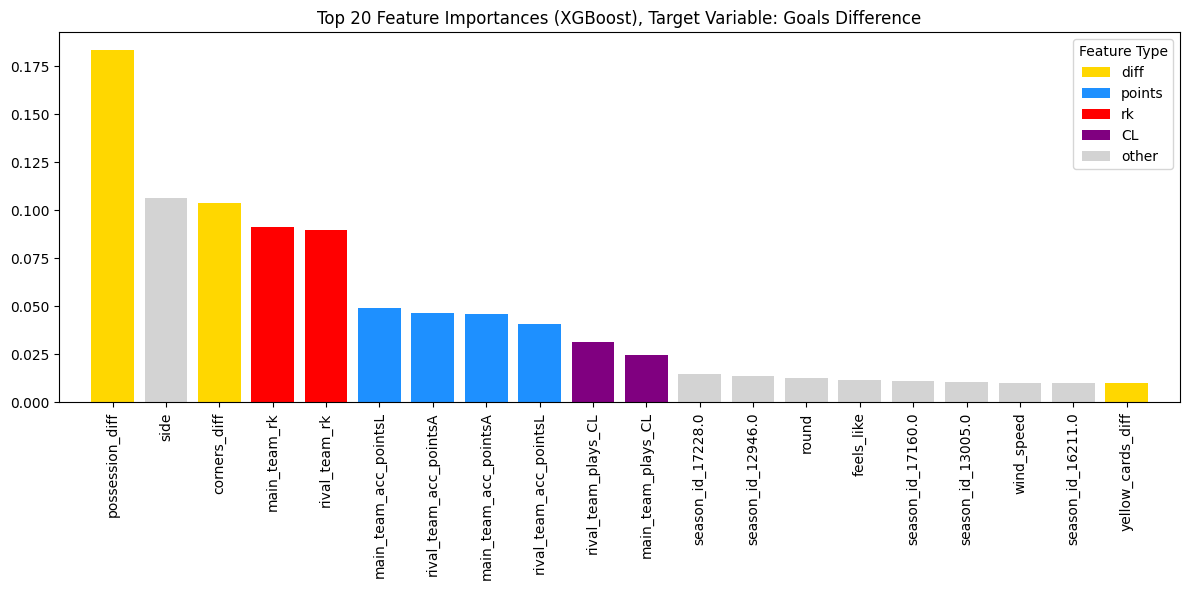

In [96]:
from matplotlib.patches import Patch

# Plot the top 20 feature importances with color legend

def get_bar_color(col):
    if "diff" in col:
        return "gold"
    elif "points" in col:
        return "dodgerblue"
    elif "rk" in col:
        return "red"
    elif "CL" in col:
        return "purple"
    else:
        return "lightgrey"

top_n = 20
top_features = [feature_names[i] for i in indices[:top_n]]
bar_colors = [get_bar_color(col) for col in top_features]

plt.figure(figsize=(12, 6))
plt.title(f"Top {top_n} Feature Importances (XGBoost), Target Variable: Goals Difference")
bars = plt.bar(range(top_n), importances[indices[:top_n]], align="center", color=bar_colors)
plt.xticks(range(top_n), top_features, rotation=90)
plt.xlim([-1, top_n])
plt.tight_layout()

# Add legend
legend_elements = [
    Patch(facecolor='gold', label='diff'),
    Patch(facecolor='dodgerblue', label='points'),
    Patch(facecolor='red', label='rk'),
    Patch(facecolor='purple', label='CL'),
    Patch(facecolor='lightgrey', label='other')
]
plt.legend(handles=legend_elements, title="Feature Type", loc="upper right")

plt.show()

## USING SHAPLEY VALUES

In [114]:
import shap

# Compute SHAP values for the XGBoost model
explainer = shap.TreeExplainer(best_models1["XGBoost"], X_train, model_output="raw")
shap_values = explainer.shap_values(X_train)

# Get mean absolute SHAP values for each feature
shap_importance = np.abs(shap_values).mean(axis=0)
shap_indices = np.argsort(shap_importance)[::-1]

#calculate also the base value
base_value = explainer.expected_value
# Print the base value
print(f"Base value (expected value): {base_value}")


# Print the feature ranking by SHAP importance
print("Feature ranking (by SHAP values):")
for i in range(len(feature_names)):
    print(f"{i + 1}. feature {feature_names[shap_indices[i]]} ({shap_importance[shap_indices[i]]})")


100%|===================| 35262/35382 [00:53<00:00]        

Base value (expected value): -0.12348384344921215
Feature ranking (by SHAP values):
1. feature side (0.2570260643130822)
2. feature possession_diff (0.20262758120187696)
3. feature corners_diff (0.13508574546073457)
4. feature rival_team_acc_pointsL (0.09849480067284992)
5. feature main_team_acc_pointsL (0.0947535899588468)
6. feature rival_team_acc_pointsA (0.09280953512723202)
7. feature main_team_rk (0.0840257237060029)
8. feature rival_team_rk (0.08039438678048948)
9. feature main_team_acc_pointsA (0.07136860801656765)
10. feature yellow_cards_diff (0.03331498636807886)
11. feature rival_team_plays_CL (0.03261042288059127)
12. feature main_team_plays_CL (0.024045129794922036)
13. feature red_cards_diff (0.01585732787795674)
14. feature round (0.006054393846481727)
15. feature season_id_12946.0 (0.0042229171361765575)
16. feature temperature (0.002360760494062634)
17. feature season_id_12962.0 (0.0017351687006597596)
18. feature season_id_18568.0 (0.001270296392661966)
19. feature s

#### The base value is slightly different from the mean of the target variable (0 as there is symmetry). This difference is just the bias of the model, but it does not inform as if the bias tonds to the local or away team since the variable side exists and hence the model is symmetric.

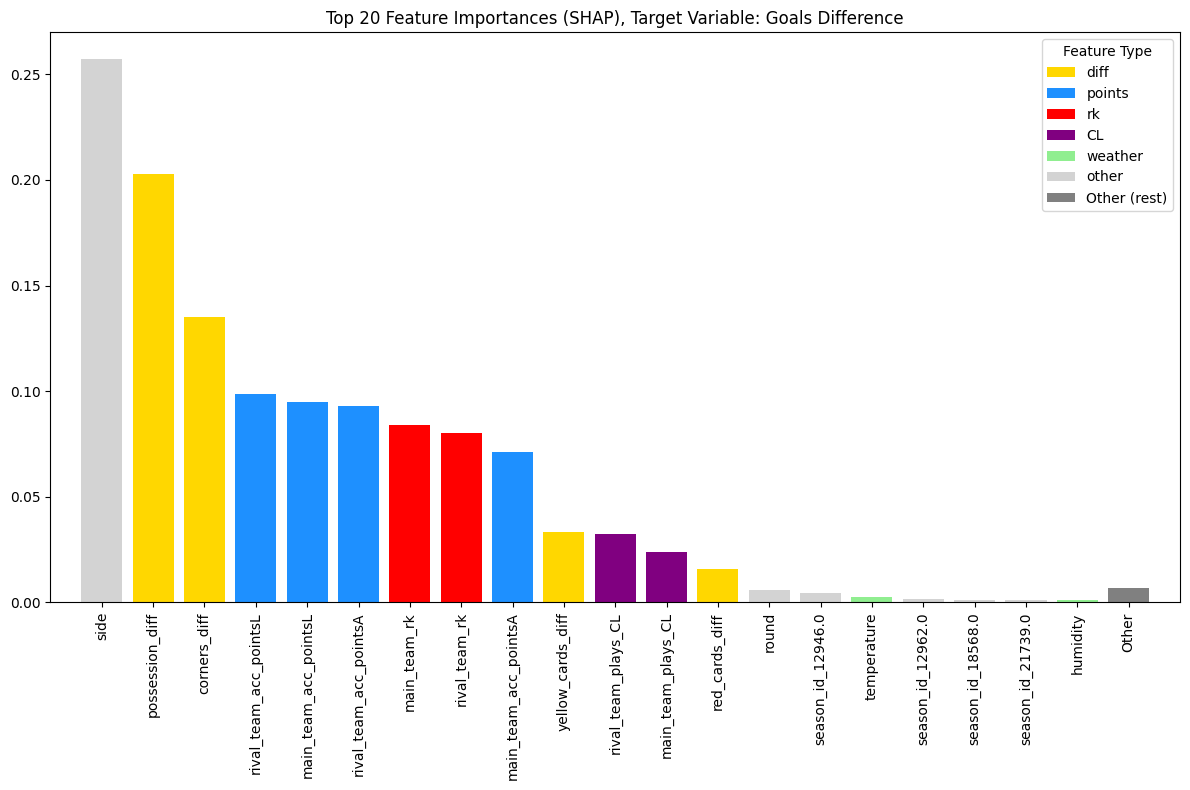

In [121]:
from matplotlib.patches import Patch

def get_bar_color(col):
    if "diff" in col:
        return "gold"
    elif "points" in col:
        return "dodgerblue"
    elif "rk" in col:
        return "red"
    elif "CL" in col:
        return "purple"
    elif col in ['clouds', 'feels_like', 'humidity', 'temperature', 'wind_speed']:
        return "lightgreen"
    else:
        return "lightgrey"

top_n = 20
top_features = [feature_names[i] for i in shap_indices[:top_n]]
bar_colors = [get_bar_color(col) for col in top_features]

# Calculate "Other" (sum of rest)
other_sum = shap_importance[shap_indices[top_n:]].sum()
top_features_with_other = top_features + ['Other']
bar_colors_with_other = bar_colors + ['grey']
shap_values_to_plot = list(shap_importance[shap_indices[:top_n]]) + [other_sum]

plt.figure(figsize=(12, 8))
plt.title(f"Top {top_n} Feature Importances (SHAP), Target Variable: Goals Difference")
bars = plt.bar(range(top_n + 1), shap_values_to_plot, align="center", color=bar_colors_with_other)
plt.xticks(range(top_n + 1), top_features_with_other, rotation=90)
plt.xlim([-1, top_n + 1])
plt.tight_layout()
legend_elements = [
    Patch(facecolor='gold', label='diff'),
    Patch(facecolor='dodgerblue', label='points'),
    Patch(facecolor='red', label='rk'),
    Patch(facecolor='purple', label='CL'),
    Patch(facecolor='lightgreen', label='weather'),
    Patch(facecolor='lightgrey', label='other'),
    Patch(facecolor='grey', label='Other (rest)')
]
plt.legend(handles=legend_elements, title="Feature Type", loc="upper right")
plt.show()

In [103]:
df_data.columns

Index(['fixture_id', 'League', 'season', 'season_id', 'round', 'date', 'month',
       'day_of_week', 'side', 'main_team', 'rival_team', 'winner',
       'goals_diff', 'main_team_formation', 'rival_team_formation',
       'main_team_lineup', 'rival_team_lineup', 'main_team_bench',
       'rival_team_bench', 'main_team_acc_possession',
       'rival_team_acc_possession', 'main_team_acc_goals',
       'rival_team_acc_goals', 'main_team_acc_corners',
       'rival_team_acc_corners', 'main_team_acc_yellow_cards',
       'rival_team_acc_yellow_cards', 'main_team_acc_red_cards',
       'rival_team_acc_red_cards', 'main_team_acc_pointsL',
       'main_team_acc_pointsA', 'main_team_acc_points',
       'rival_team_acc_pointsL', 'rival_team_acc_pointsA',
       'rival_team_acc_points', 'main_team_plays_CL', 'rival_team_plays_CL',
       'main_team_rk', 'rival_team_rk', 'participants', 'statistics', 'events',
       'clouds', 'feels_like', 'humidity', 'temperature', 'wind_speed',
       'combined

In [108]:
df_data["goals_diff"].describe()

count    44228.000000
mean         0.000000
std          1.771795
min        -13.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max         13.000000
Name: goals_diff, dtype: float64

In [118]:
print("Target Mean:", y_train.mean())
print("Prediction Mean:", y_train_pred.mean())
print("SHAP Base Value:", base_value)

Target Mean: 0.0
Prediction Mean: 0.0016112183
SHAP Base Value: -0.12348384344921215


In [119]:
import shap
import numpy as np

# Best trained model
model = best_models1["XGBoost"]

# Use TreeExplainer for tree-based models
explainer = shap.Explainer(model, X_train)

# Get SHAP values for the training data
shap_values = explainer(X_train)

# Base value (SHAP φ₀)
base_value = shap_values.base_values.mean()
print(f"SHAP Base Value: {base_value:.4f}")

# Mean of actual predictions
y_train_pred = model.predict(X_train)
print(f"Prediction Mean: {np.mean(y_train_pred):.4f}")

# Target mean
print(f"Target Mean: {np.mean(y_train):.4f}")

# SHAP additive check
reconstructed = shap_values.base_values + shap_values.values.sum(axis=1)
assert np.allclose(reconstructed, y_train_pred, atol=1e-6), "Additivity check failed!"


 98%|===================| 34761/35382 [00:34<00:00]        

SHAP Base Value: -0.1235
Prediction Mean: 0.0016
Target Mean: 0.0000


c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

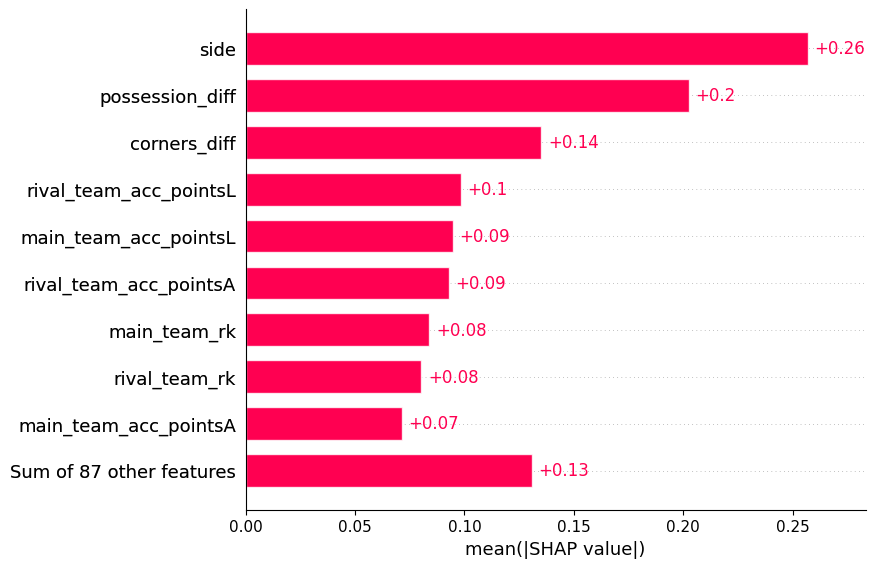

ValueError: setting an array element with a sequence.

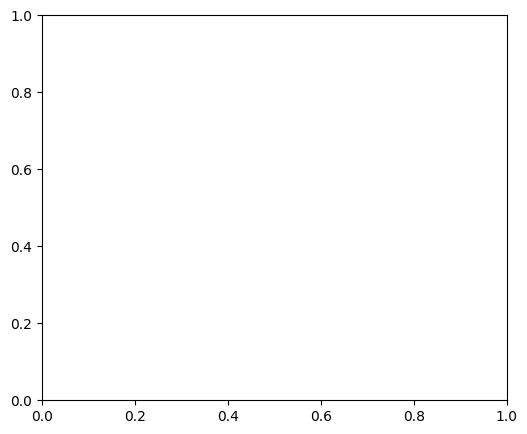